In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plot
df = pd.read_csv('https://raw.githubusercontent.com/mgenardi5/Data-Analytics-Project-3/main/NYPD_Arrest_Data__Year_to_Date_.csv')
#Import data set and packages

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


In [4]:
df.dtypes
#highlevel review of dataset

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [5]:
df['ARREST_BORO'].unique()
#understand values in desired field for analysis

array(['S', 'M', 'B', 'Q', 'K'], dtype=object)

In [6]:
df['ARREST_BORO'].replace('K','Brooklyn',inplace=True)
df['ARREST_BORO'].replace('B','Bronx',inplace=True)
df['ARREST_BORO'].replace('Q','Queens',inplace=True)
df['ARREST_BORO'].replace('M','Manhattan',inplace=True)
df['ARREST_BORO'].replace('S','Staten Island',inplace=True)
#replace borough values based on data dictionary

In [10]:
df['LAW_CAT_CD'].unique()

array(['F', 'M', '9', nan, 'V', 'I'], dtype=object)

In [14]:
df['LAW_CAT_CD'].replace('F','Felony',inplace=True)
df['LAW_CAT_CD'].replace('M','Misdemeanor',inplace=True)
df['LAW_CAT_CD'].replace('V','Violation',inplace=True)
#replace level of offense values based on data dictionary

In [15]:
df1 = df.loc[(df['LAW_CAT_CD'] == 'Felony') | (df['LAW_CAT_CD'] == 'Violation') | (df['LAW_CAT_CD'] == 'Misdemeanor')]
#exclude data entries that are not defined in data dictionary

In [17]:
df2 = df1.loc[:,['ARREST_KEY','LAW_CAT_CD', 'ARREST_BORO']]
df3 = df2.rename(columns = {'ARREST_KEY':'Arrest_ID' ,'LAW_CAT_CD':'Level_of_Offense', 'ARREST_BORO':'Borough'})
df3
#Remove unnecessary columns and rename

,Arrest_ID,Level_of_Offense,Borough
0,263187871,Felony,Staten Island
1,261368273,Misdemeanor,Manhattan
2,261667175,Misdemeanor,Bronx
3,264298625,Felony,Queens
4,261516485,Felony,Manhattan
...,...,...,...
54571,265375648,Felony,Queens
54572,265375611,Misdemeanor,Manhattan
54573,265027445,Felony,Queens
54574,265277526,Misdemeanor,Queens


In [24]:
df_offense = df3.groupby(['Level_of_Offense'])['Arrest_ID'].count().reset_index(name='count')
df_offense
#Showing far less violation offense instances than Felony and Misdemeanor

,Level_of_Offense,count
0,Felony,23288
1,Misdemeanor,30325
2,Violation,309


In [25]:
df_borough = df3.groupby(['Borough'])['Arrest_ID'].count().reset_index(name='count')
df_borough
#Instances of offenses split pretty evenly between all boroughs except Staten Island

,Borough,count
0,Bronx,12749
1,Brooklyn,15144
2,Manhattan,12305
3,Queens,11401
4,Staten Island,2323


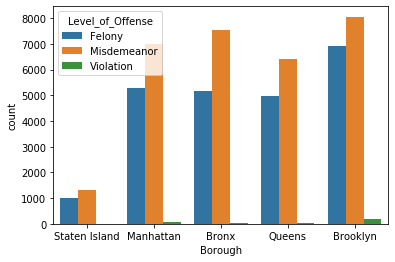

In [29]:
sn.countplot(x = 'Borough', hue = 'Level_of_Offense', data = df3)

Text(0.5, 1.0, 'Misdemeanor Arrests by Borough')

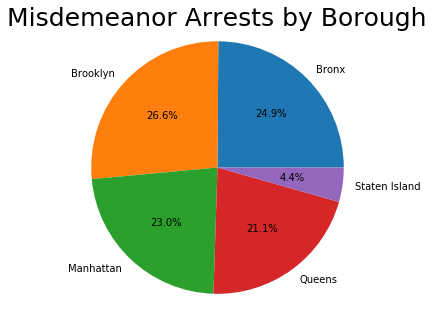

In [36]:
df_offense_misdemeanor = df3.query("Level_of_Offense == 'Misdemeanor'").groupby(['Borough'])['Arrest_ID'].count().reset_index(name='count')
labels = df_offense_misdemeanor['Borough']
arrests = df_offense_misdemeanor['count']

plot.figure(figsize=(5,5))
plot.pie(arrests, labels = labels, autopct='%1.1f%%')
plot.axis('equal')
plot.title('Misdemeanor Arrests by Borough',fontsize = 25)

Text(0.5, 1.0, 'Felony Arrests by Borough')

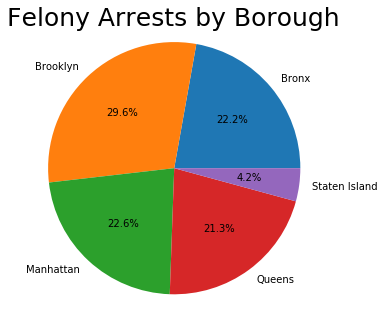

In [37]:
df_offense_felony = df3.query("Level_of_Offense == 'Felony'").groupby(['Borough'])['Arrest_ID'].count().reset_index(name='count')
labels = df_offense_felony['Borough']
arrests = df_offense_felony['count']

plot.figure(figsize=(5,5))
plot.pie(arrests, labels = labels, autopct='%1.1f%%')
plot.axis('equal')
plot.title('Felony Arrests by Borough',fontsize = 25)

Text(0.5, 1.0, 'All Arrests by Borough')

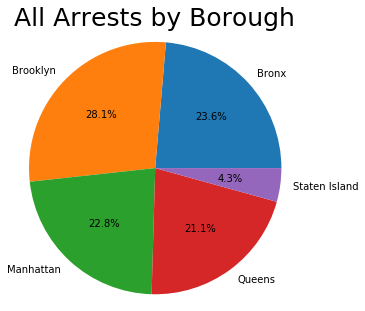

In [38]:
df_offenses = df3.groupby(['Borough'])['Arrest_ID'].count().reset_index(name='count')
labels = df_offenses['Borough']
arrests = df_offenses['count']

plot.figure(figsize=(5,5))
plot.pie(arrests, labels = labels, autopct='%1.1f%%')
plot.axis('equal')
plot.title('All Arrests by Borough',fontsize = 25)

In [39]:
#Conclusions: In all boroughs, there are more arrests for misdemeanors than felonies. Violations make up a very small fraction of arrests.
#Looking at by Borough, Brooklyn consistently has the highest relative percentage of arrests in total and by signficiant type (excluding violations)